<a href="https://colab.research.google.com/github/luca-g97/Master-Thesis/blob/main/Interactive_AI_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization: Imports and Dependencies

In [ ]:
# @title Click `Show code` in the code cell. { display-mode: "form" }
!export TF_ENABLE_ONEDNN_OPTS=0

# Suppress FutureWarning globally
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Check for local host time. If locally hosted, make sure all dependencies are generated
runningLocal = False if 'google.colab' in str(get_ipython()) else True
print("Running locally" if runningLocal else "Running in Colab")

# if(runningLocal):
import sys
import site

# Add the user site-packages directory to the Python path (for local usage especially)
site.addsitedir('/tf/.local/lib/python3.11/site-packages')

Running in Colab


In [ ]:
# @title Click `Show code` in the code cell. { display-mode: "form" }

!python3 -m pip install -q --upgrade pip

# # Install specific versions of the libraries
# !pip install -q torch==2.4.1
# !pip install -q keras==3.4.1
# !pip install -q tqdm==4.66.5
# !pip install -q plotly==5.24.1
# !pip install -q ipython==7.34.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.7 MB/s eta 0:00:00


**If something doesn´t work please uncomment the block above and install the specific versions - those were the ones we last tested with.**

In [ ]:
# @title Click `Show code` in the code cell. { display-mode: "form" }

import timeit

#Libraries related to Torch
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

#Libraries needed for MNIST dataset
from tqdm import tqdm
from keras.datasets import mnist
from keras.utils import to_categorical

#Libraries needed for HSV-RGB
import colorsys

#Libraries needed for LLM dataset
!pip install -q lorem==0.1.1
!pip install -q tiktoken==0.8.0
#!pip install -q numpy==1.26.4 scipy spacy
#!python -m spacy download en_core_web_sm -q
#import spacy
import lorem
import tiktoken
import random
from transformers import GPT2Tokenizer
#!pip install -q datasets
#from datasets import load_dataset
!pip install -q stanza
import stanza
# Suppress logging from stanza
nlp = stanza.Pipeline('en', verbose=False)
stanza.download('en', verbose=False)

#Library needed for correct displaying widgets in Google Colab
!pip install -q ipywidgets==7.7.1

#Libraries needed for Visualization
!pip install -q plotly
from IPython.display import display, clear_output
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

#Libraries needed for Zipping
import io
import pandas as pd
!pip install -q pyarrow
import pyarrow as pa
!pip install -q pyarrow-parquet
import pyarrow.parquet as pq
!pip install -q zstandard
import zstandard as zstd

#Set the correct device. Prefer a graphics card (cuda) if possible
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Using device type: ", device)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pyarrow-parquet (from versions: none)
ERROR: No matching distribution found for pyarrow-parquet
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 57.5 MB/s eta 0:00:00
Using device type:  cpu


**If the notebook is run via Colab, download all necessary files from Github if they aren´t downloaded yet. If you run it locally, please provide them yourself to be able to change them at runtime. We recommend using the following docker image for this: https://hub.docker.com/r/lucag97/colab-server**

In [ ]:
#@title Click `Show code` in the code cell. { display-mode: "form" }

import os

# Define the files and directories you expect to be present
expected_files = ['Customizable_RENN.py','Images_HSVRGB.py','Images_MNIST.py','LLM_Small1x1.py', 'LLM_Verdict.py', 'Widgets.py']

# Check for each expected file and directory
def checkIfAllFilesArePresent(expected_files):
    for item in expected_files:
        #path = os.path.join("/content/", item)
        path = os.path.join("./", item)
        if not os.path.exists(path):
            print(f'Missing: {path}')
            return False
    return True

#If not locally running and not all files are present
if not ((checkIfAllFilesArePresent(expected_files)) and runningLocal):
    #!rm -rf /content/*
    !rm -rf ./*
    #Requesting the relevant files from Github
    #!git clone "https://github.com/luca-g97/Master-Thesis.git" /content/Interactive-AI-Playground
    !git clone "https://github.com/luca-g97/Master-Thesis.git" ./Interactive-AI-Playground

    #Move the files into the content folder and delete the original folder afterwards
    #!mv /content/Interactive-AI-Playground/Google_Colab-Interactive_AI_Playground/* /content/
    !mv ./Interactive-AI-Playground/Google_Colab-Interactive_AI_Playground/* ./
    #!rm -rf /content/Interactive-AI-Playground/
    !rm -rf ./Interactive-AI-Playground/

Missing: ./Customizable_RENN.py
Cloning into './Interactive-AI-Playground'...
remote: Enumerating objects: 843, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 843 (delta 136), reused 120 (delta 68), pack-reused 654 (from 1)
Receiving objects: 100% (843/843), 5.87 MiB | 12.13 MiB/s, done.
Resolving deltas: 100% (515/515), done.


#Initialization: Datasets

**MNIST: Number Classification**

In [ ]:
import Images_MNIST as MNIST
MNIST.initializePackages(mnist, to_categorical, nn, DataLoader, device)
trainSetMNIST, testSetMNIST = MNIST.createTrainAndTestSet()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning:

Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Created 60000 Trainsamples & 10000 Testsamples


**HSV -> RGB Conversion**

In [ ]:
import Images_HSVRGB as HSVRGB
HSVRGB.initializePackages(colorsys, go, pio, DataLoader, device)
#Set visualize to True if you want to see the 3D-cube containing both the train and test samples
trainSetHSVRGB, testSetHSVRGB = HSVRGB.createTrainAndTestSet(50000, 10000, visualize=False)

Created 50653 Trainsamples & 10000 Testsamples


**Small 1x1: LLM-Sourcecheck**

In [ ]:
import LLM_Small1x1 as Small1x1
Small1x1.initializePackages(random, lorem, device, tiktoken, DataLoader)
small1x1 = Small1x1.createTrainAndTestSet(100)

Created 100 samples for Small1x1


**The Verdict: LLM-Sourcecheck**

In [ ]:
import LLM_Verdict as Verdict
Verdict.initializePackages(random, lorem, device, tiktoken, DataLoader, nlp, GPT2Tokenizer)
#verdict = Verdict.createTrainSet()
verdict = Verdict.createWikiTrainSet("sports")
#verdict = Verdict.createEnglishWikiTrainSet("./english_wikipedia/data/train-00021-of-00022-8014350d27e6cde7.parquet")

Number of titles fetched from category 'sports': 61
Created a training set with 445 sentences


In [ ]:
print(verdict)

['Sport is a form of physical activity or game.', 'Often competitive and organized, sports use, maintain, or improve physical ability and skills.', 'They also provide enjoyment to participants and, in some cases, entertainment to spectators.', 'Many sports exist, with different participant numbers, some are done by a single person with others being done by hundreds.', 'Most sports take place either in teams or competing as individuals.', 'Some sports allow a "tie" or "draw", in which there is no single winner; others provide tie-breaking methods to ensure one winner.', 'A number of contests may be arranged in a tournament format, producing a champion.', 'Many sports leagues make an annual champion by arranging games in a regular sports season, followed in some cases by playoffs.', 'Sport is generally recognised as system of activities based in physical athleticism or physical dexterity, with major competitions admitting only sports meeting this definition.', 'Some organisations, such a

#Initialization

In [ ]:
datasets = {
    "MNIST": (trainSetMNIST, testSetMNIST),
    "HSV-RGB": (trainSetHSVRGB, testSetHSVRGB),
    "Small 1x1": (small1x1[:int(len(small1x1) * 0.8)], small1x1[int(len(small1x1) * 0.8):]),
    "The Verdict": (verdict[:int(len(verdict) * 0.8)], verdict[int(len(verdict) * 0.8):])
}

**After the first run of the notebook, the samples in the Training tab, get set to 10 somehow. Just rerun the cell below and everything should work again.**

In [ ]:
import Widgets
Widgets.initialize(trainSetMNIST, testSetMNIST, datasets)

**To use your settings, please click on the cell below and choose "Runtime -> Run cell and below" from the options menu of Colab**

# Selection Initialization

In [ ]:
# @title Click `Show code` in the code cell. { display-mode: "form" }

datasetChoice = Widgets.datasetChoice.value

if(datasetChoice == "MNIST"):
    chosenDataSet = MNIST
elif(datasetChoice == "HSV-RGB"):
    chosenDataSet = HSVRGB
elif(datasetChoice == "Small 1x1"):
    chosenDataSet = Small1x1
elif(datasetChoice == "The Verdict"):
    chosenDataSet = Verdict

seed = ""
if (Widgets.seedChoice.value != "Random"):
    seed = Widgets.seedChoice.value
useBitLinear = Widgets.useBitLinearChoice.value

if datasetChoice in ["Small 1x1", "The Verdict"]:
    LLM_Layers, TransformerBlockLayer = chosenDataSet.setGPTSettings(Widgets.layerAmountChoice.value, Widgets.learningRateChoice.value, Widgets.epochsChoice.value)
    hidden_sizes = [[LLM_Layers[0]]]
    for _ in range(Widgets.layerAmountChoice.value):
        hidden_sizes.append(TransformerBlockLayer)
    hidden_sizes.append(LLM_Layers[1])
    hidden_sizes = [item for sublist in hidden_sizes for item in sublist]

else:
    hidden_sizes = [(normalLayer.value, normalLayerSize.value, activationLayer.value) for normalLayer, normalLayerSize, activationLayer in zip(Widgets.normalLayerChoice, Widgets.normalLayerSizeChoice, Widgets.activationLayerChoice)]
    hidden_sizes.append((Widgets.outputLayerChoice.value, 10, Widgets.outputActivationLayerChoice.value))

visualizeCustom = [((normalLayer.value[0], normalLayer.value[1]), activationLayer.value) for normalLayer, activationLayer in zip(Widgets.neuronChoice, Widgets.activationLayerTypeChoice)]
visualizeCustom.append(((Widgets.outputLayerSizeChoice.value[0], Widgets.outputLayerSizeChoice.value[1]), Widgets.outputLayerActivationChoiceType.value))

epochs = Widgets.epochsChoice.value
learning_rate = Widgets.learningRateChoice.value
train_samples = Widgets.trainSamplesChoice.value
test_samples = Widgets.testSamplesChoice.value
batch_size_training = Widgets.batchSizeTraining.value
batch_size_test = Widgets.batchSizeTest.value
loss_function = Widgets.lossChoice.value
optimizer = Widgets.optimizerChoice.value
eval_samples = Widgets.evalSamplesChoice.value

closestSources = Widgets.closestSourcesChoice.value if Widgets.closestSourcesChoice.value <= train_samples else train_samples
showClosestMostUsedSources = Widgets.showClosestMostUsedSourcesChoice.value
visualizationChoice = Widgets.visualizationChoice.value

In [ ]:
# @title Click `Show code` in the code cell. { display-mode: "form" }

import numpy as np
from collections import defaultdict

dtype = np.dtype([('source', 'U20'), ('value', 'f8'), ('difference', np.float64)])

# Create a compatible fill_value
fill_value = np.array(('None', np.inf, np.inf), dtype=dtype)

#evaluationTest = np.full((train_samples+eval_samples, len(hidden_sizes), np.max([h[1] for h in hidden_sizes]), closestSources),fill_value=fill_value, dtype=dtype)

# Memory usage for each element (in bytes)
element_memory = 3 + 8 + 8  # Source (3 bytes) + value (8 bytes) + difference (8 bytes)

# Initialize total elements to 0
total_non_zero_elements = 0
total_non_zero_elements_in_list = 0

# Loop through layers and add the non-zero elements per layer
for layer in hidden_sizes:
    neurons_in_layer = layer[1]
    total_non_zero_elements += eval_samples * neurons_in_layer * closestSources
    total_non_zero_elements_in_list += eval_samples * neurons_in_layer * train_samples

# Total memory (in bytes)
total_storage_bytes = (total_non_zero_elements * 2) * element_memory
total_storage_for_list_bytes = (total_non_zero_elements_in_list * 2) * element_memory

# Convert to MB
total_storage_mb = total_storage_bytes / (1024 ** 2)
total_storage_for_list_mb = total_storage_for_list_bytes / (1024 ** 2)

print(f"Total memory usage for the sparse tensor: {total_storage_mb:.2f} MB")
print(f"Total memory usage for the list: {total_storage_for_list_mb:.2f} MB")

Total memory usage for the sparse tensor: 0.40 MB
Total memory usage for the list: 96.40 MB


In [ ]:
import Customizable_RENN as RENN
RENN.initializePackages(device, io, pd, pa, pq, zstd, seed, useBitLinear)

# Training

In [ ]:
chosenDataSet.initializeDatasets(train_samples, test_samples, eval_samples, batch_size_training, batch_size_test, seed)
chosenDataSet.trainModel(hidden_sizes, loss_function, optimizer, learning_rate, epochs)

Setting random seed
Created all dataloaders
Model initialized, Starting training
Epoch 1, Train Loss: 0.042030163916053284, Validation Loss: 0.037242667574901134
Epoch 2, Train Loss: 0.029972965081643526, Validation Loss: 0.031549494073260576
Epoch 3, Train Loss: 0.026858439301229588, Validation Loss: 0.029313427105080336
Epoch 4, Train Loss: 0.02488751709461212, Validation Loss: 0.028158292931038886
Epoch 5, Train Loss: 0.0235282729860324, Validation Loss: 0.02722708141664043
Epoch 6, Train Loss: 0.022573416067916116, Validation Loss: 0.026719278655946255
Epoch 7, Train Loss: 0.021885486438300957, Validation Loss: 0.025841944094281644
Epoch 8, Train Loss: 0.02133004690051838, Validation Loss: 0.0256489118328318
Epoch 9, Train Loss: 0.020943937754958487, Validation Loss: 0.025694727548398077
Epoch 10, Train Loss: 0.02063227344339915, Validation Loss: 0.02553906006505713
Training finished


# Sourcecheck Customisable RENN

In [ ]:
elapsed_time = timeit.timeit(
    lambda: chosenDataSet.initializeHook(hidden_sizes, train_samples),
    number=1  # Run it once
)
print(f"Time taken: {elapsed_time:.2f} seconds")

Initializing Hooks
Hook-Dictionaries created
Hooks finished successfully
Time taken: 19.31 seconds


# Visualization Customisable RENN

Total closest Sources : 11172  |  42  closest Sources (  ) in format: [SourceNumber, Occurances]:  [(9214, 13), (467, 10), (3116, 10), (4338, 9), (2591, 9), (9082, 9), (798, 9), (2752, 9), (223, 9), (9162, 8), (5584, 8), (9444, 8), (8959, 8), (8280, 8), (4647, 8), (6902, 8), (9954, 8), (9843, 7), (5416, 7), (8931, 7), (2417, 7), (2054, 7), (1422, 7), (5447, 7), (640, 7), (1803, 7), (2142, 7), (3448, 7), (9426, 7), (2115, 7), (5206, 7), (8804, 7), (5651, 7), (7352, 7), (9273, 7), (7388, 7), (4458, 6), (7509, 6), (301, 6), (2161, 6), (5465, 6), (9606, 6)]
Total closest Sources : 11172  |  42  closest Sources (  ) in format: [SourceNumber, Occurances]:  [(0, 103), (4999, 26), (6158, 14), (6173, 14), (5584, 14), (6658, 14), (9999, 14), (6153, 13), (6663, 13), (6662, 13), (6644, 13), (6645, 13), (6646, 13), (6647, 13), (6648, 13), (6653, 13), (6654, 13), (6166, 12), (6132, 12), (6129, 12), (6176, 12), (6187, 12), (6664, 12), (6673, 12), (6661, 12), (6660, 12), (6659, 12), (6643, 12), (6649,

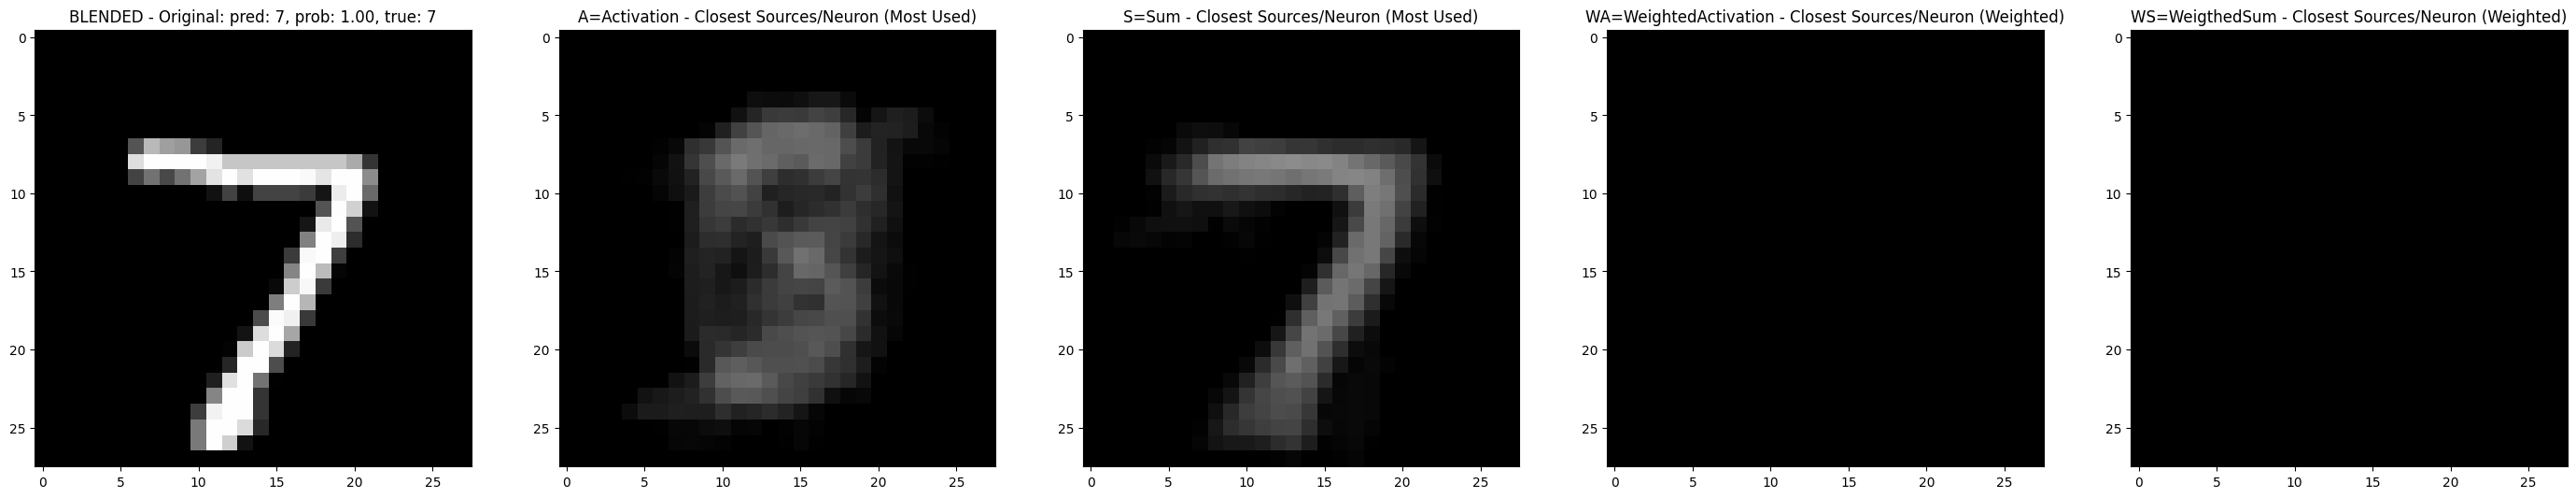

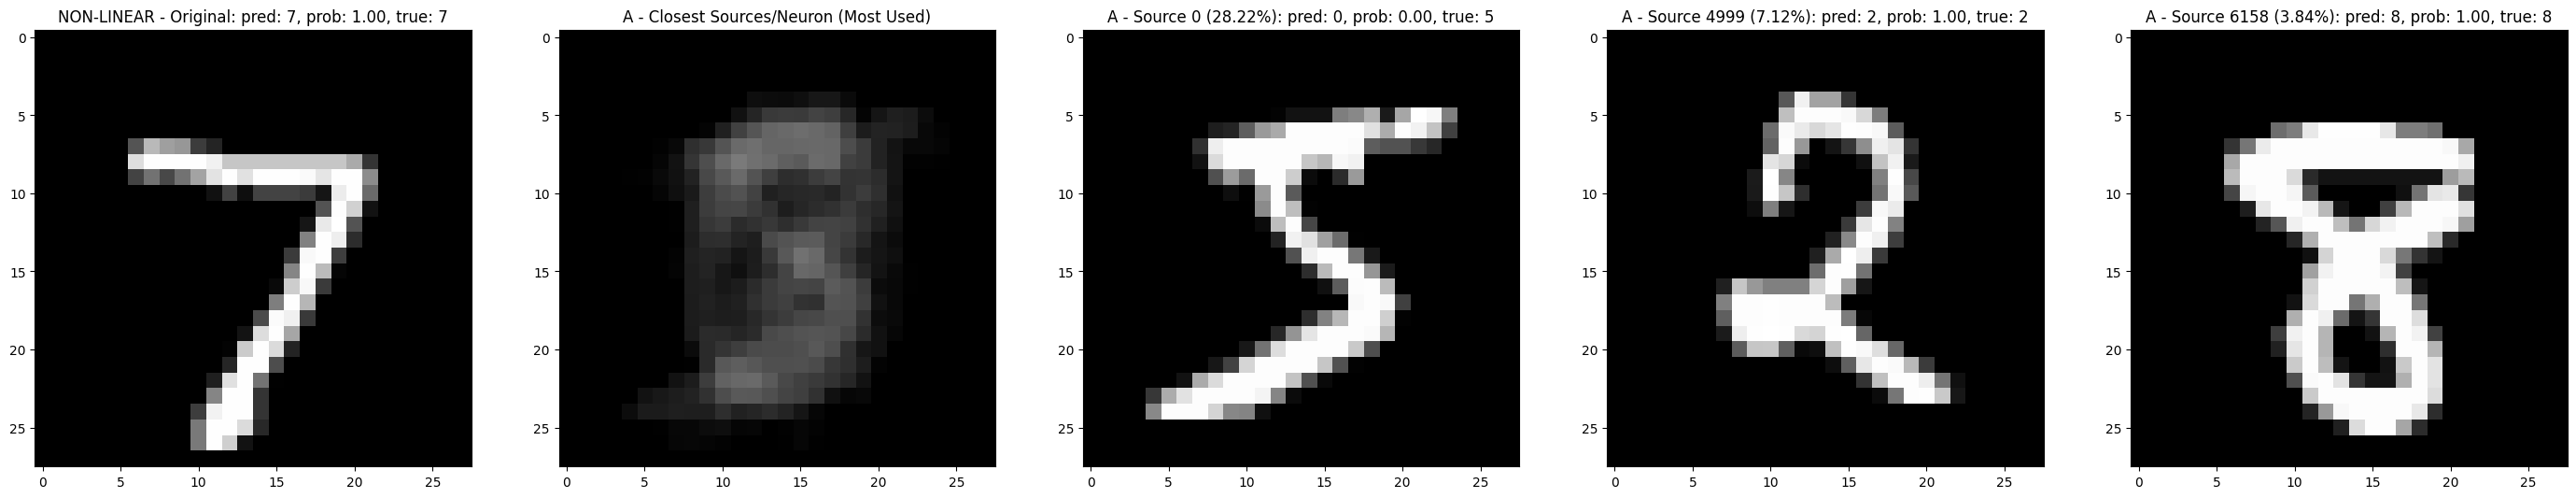

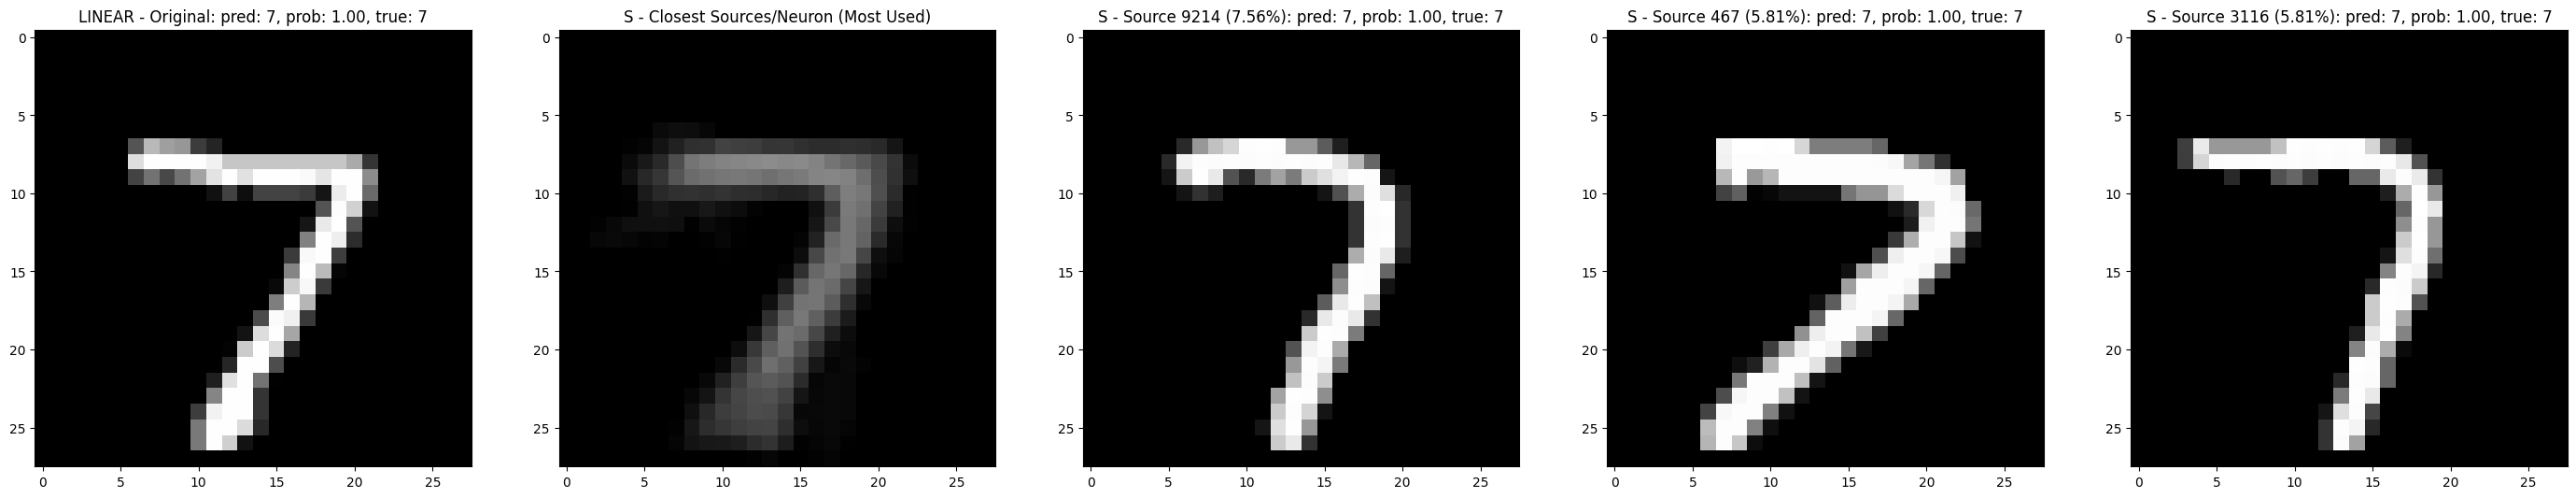

Total closest Sources : 11172  |  42  closest Sources (  ) in format: [SourceNumber, Occurances]:  [(9214, 13), (467, 10), (3116, 10), (4338, 9), (2591, 9), (9082, 9), (798, 9), (2752, 9), (223, 9), (9162, 8), (5584, 8), (9444, 8), (8959, 8), (8280, 8), (4647, 8), (6902, 8), (9954, 8), (9843, 7), (5416, 7), (8931, 7), (2417, 7), (2054, 7), (1422, 7), (5447, 7), (640, 7), (1803, 7), (2142, 7), (3448, 7), (9426, 7), (2115, 7), (5206, 7), (8804, 7), (5651, 7), (7352, 7), (9273, 7), (7388, 7), (4458, 6), (7509, 6), (301, 6), (2161, 6), (5465, 6), (9606, 6)]

--- Blended Activation Similarity Scores ---
Kendall's Tau: 0.86
Spearman's Rho: nan
Cosine Similarity: 0.9691
Euclidean Distance: 2.9748
Manhattan Distance: 35.6667
Jaccard Similarity: N/A
Hamming Distance: 0.6927
Pearson Correlation: 0.9683
Time taken: 4.83 seconds


In [ ]:
elapsed_time = timeit.timeit(
    lambda: chosenDataSet.visualize(hidden_sizes, closestSources, showClosestMostUsedSources, visualizationChoice, visualizeCustom, True),
    number=1  # Run it once
)
print(f"Time taken: {elapsed_time:.2f} seconds")

**Only for HSV-RGB conversion: The visualization cell (cell above) must be run before, otherwise there will nothing be displayed!**

In [ ]:
# @title Click `Show code` in the code cell. { display-mode: "form" }

if(datasetChoice == "HSV-RGB"):
    layerChoiceSlider = Widgets.createIntSlider(value=0, min=0, max=len(hidden_sizes)-1, description="Layer")
    neuronChoiceSlider = Widgets.createIntSlider(value=0, min=0, max=hidden_sizes[layerChoiceSlider.value][1]-1, description="Neuron")

    def update_sliders(*args):
        neuronChoiceSlider.max = hidden_sizes[layerChoiceSlider.value][1]-1
        clear_output()
        display(layerChoiceSlider, neuronChoiceSlider)

    layerChoiceSlider.observe(update_sliders, names='value')
    neuronChoiceSlider.observe(update_sliders, names='value')

    display(layerChoiceSlider, neuronChoiceSlider)

**Only for HSV-RGB conversion: Pick the layer and neuron you want to be displayed, then run the cell below to display it**

In [ ]:
# @title Click `Show code` in the code cell. { display-mode: "form" }

if(datasetChoice == "HSV-RGB"):
    def update_visualization(*args):
        clear_output()
        chosenDataSet.visualize3DCube(closestSources, layerChoiceSlider.value, neuronChoiceSlider.value, hidden_sizes[layerChoiceSlider.value][1]-1)

    #Observing causes problems here, which are not fixable somehow (Windows disappearing)
    #layerChoiceSlider.observe(update_visualization, names='value')
    #neuronChoiceSlider.observe(update_visualization, names='value')

    update_visualization()